In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
data = load_digits()
X,Y = data.data,data.target

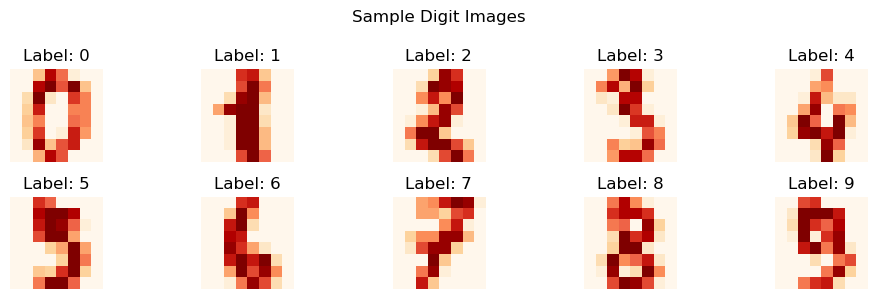

In [9]:
#Plotting data digis 0->9
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data.images[i], cmap='OrRd')
    plt.title(f'Label: {data.target[i]}')
    plt.axis('off')
plt.suptitle('Sample Digit Images')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Digit'}>]], dtype=object)

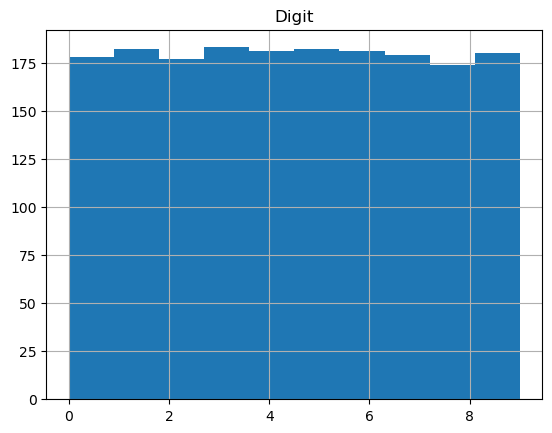

In [20]:
df = pd.DataFrame({'Digit': Y})

# Plot class distribution
df.hist()

In [21]:
StandScal = StandardScaler()
X_scaled = StandScal.fit_transform(X)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types to try
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]  # Degree of the polynomial kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)


In [25]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,train_size=0.8,random_state=35)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

Support Vector Classifier Metrics: 
Accuracy : 0.9666666666666667
precision : 0.9673630181819729
Recall : 0.9666666666666667
F1 Score : 0.9665837676878907
Confusion Matrix of Logisitc Regression :


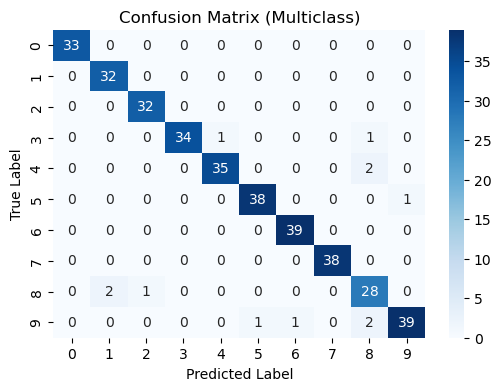

In [26]:
y_pred = grid_search.predict(x_test)
print("Support Vector Classifier Metrics: ")
print(f"Accuracy : {accuracy_score(y_pred,y_test)}")
print(f"precision : {precision_score(y_pred,y_test,average='weighted')}")
print(f"Recall : {recall_score(y_pred,y_test,average='weighted')}")
print(f"F1 Score : {f1_score(y_pred,y_test,average='weighted')}")


print("Confusion Matrix of Logisitc Regression :")
cm1 = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Multiclass)")
plt.show()

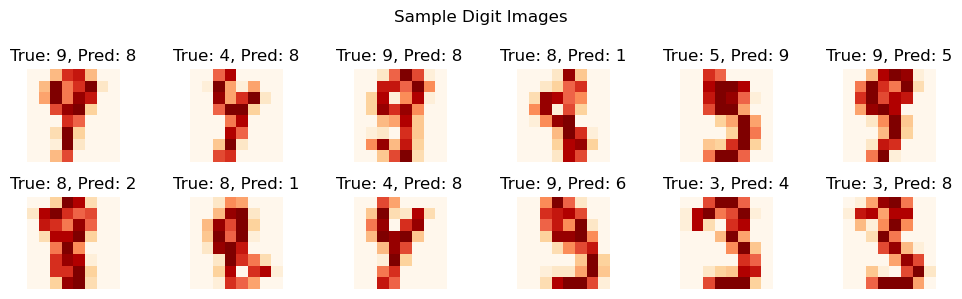

In [61]:
#Miss Classified Digits
miss_classified_indexes = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        miss_classified_indexes.append(i)

misclassified_samples = x_test[miss_classified_indexes]
misclassified_samples = StandScal.inverse_transform(misclassified_samples)
misclassified_labels = y_test[miss_classified_indexes]
misclassified_pred = y_pred[miss_classified_indexes]

plt.figure(figsize=(10, 3))
j = 0

for i in range(len(misclassified_labels)):
    plt.subplot(2, 6, i + 1)
    plt.imshow(misclassified_samples[i].reshape(8,8), cmap='OrRd')
    plt.title(f'True: {misclassified_labels[i]}, Pred: {misclassified_pred[i]}')
    plt.axis('off')
plt.suptitle('Sample Digit Images')
plt.tight_layout()
plt.show() 
